In [1]:
from fastai.vision.all import *

In [12]:
DATASET_PATH = Path('RockPaperScissors/data')

In [13]:
DATASET_PATH

Path('RockPaperScissors/data')

In [14]:
DATASET_PATH.ls()

(#5) [Path('RockPaperScissors/data/valid'),Path('RockPaperScissors/data/.DS_Store'),Path('RockPaperScissors/data/Rock-Paper-Scissors'),Path('RockPaperScissors/data/train'),Path('RockPaperScissors/data/test2')]

In [5]:
(DATASET_PATH/'train').ls()

(#4) [Path('RockPaperScissors/data/train/paper'),Path('RockPaperScissors/data/train/.DS_Store'),Path('RockPaperScissors/data/train/rock'),Path('RockPaperScissors/data/train/scissors')]

In [6]:
(DATASET_PATH/'train/paper').ls()

(#840) [Path('RockPaperScissors/data/train/paper/paper03-088.png'),Path('RockPaperScissors/data/train/paper/paper05-026.png'),Path('RockPaperScissors/data/train/paper/paper05-032.png'),Path('RockPaperScissors/data/train/paper/paper03-077.png'),Path('RockPaperScissors/data/train/paper/paper03-063.png'),Path('RockPaperScissors/data/train/paper/paper02-099.png'),Path('RockPaperScissors/data/train/paper/paper04-037.png'),Path('RockPaperScissors/data/train/paper/paper04-023.png'),Path('RockPaperScissors/data/train/paper/paper02-066.png'),Path('RockPaperScissors/data/train/paper/paper02-072.png')...]

In [11]:
rock_train = (DATASET_PATH/'train'/'rock').ls().sorted()
paper_train = (DATASET_PATH/'train'/'paper').ls().sorted()
scissors_train = (DATASET_PATH/'train'/'scissors').ls().sorted()

In [12]:
rock_train

(#840) [Path('RockPaperScissors/data/train/rock/rock01-000.png'),Path('RockPaperScissors/data/train/rock/rock01-001.png'),Path('RockPaperScissors/data/train/rock/rock01-002.png'),Path('RockPaperScissors/data/train/rock/rock01-003.png'),Path('RockPaperScissors/data/train/rock/rock01-004.png'),Path('RockPaperScissors/data/train/rock/rock01-005.png'),Path('RockPaperScissors/data/train/rock/rock01-006.png'),Path('RockPaperScissors/data/train/rock/rock01-007.png'),Path('RockPaperScissors/data/train/rock/rock01-008.png'),Path('RockPaperScissors/data/train/rock/rock01-009.png')...]

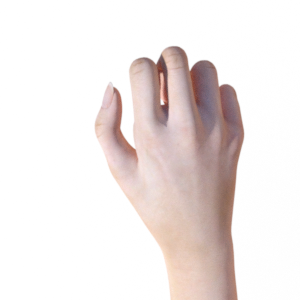

In [13]:
rock_img = rock_train[3]
img = Image.open(rock_img)
img

In [16]:
#what the pytorch tensor looks like
tensor(img)[7:10, 7:10]

tensor([[[255, 255, 255, 255],
         [255, 255, 255, 255],
         [255, 255, 255, 255]],

        [[255, 255, 255, 255],
         [255, 255, 255, 255],
         [255, 255, 255, 255]],

        [[255, 255, 255, 255],
         [255, 255, 255, 255],
         [255, 255, 255, 255]]], dtype=torch.uint8)

In [17]:
rock_tensors = [tensor(Image.open(o)) for o in rock_train]
paper_tensors = [tensor(Image.open(o)) for o in paper_train]
scissors_tensors = [tensor(Image.open(o)) for o in scissors_train]

In [19]:
len(rock_tensors), len(paper_tensors), len(scissors_tensors)

(840, 840, 840)

In [20]:
stacked_rock = torch.stack(rock_tensors).float()/255
stacked_paper = torch.stack(paper_tensors).float()/255
stacked_scissors = torch.stack(scissors_tensors).float()/255
stacked_rock.shape

torch.Size([840, 300, 300, 4])

In [21]:
stacked_paper.shape

torch.Size([840, 300, 300, 4])

In [22]:
stacked_scissors.shape

torch.Size([840, 300, 300, 4])

In [15]:
rps_datablock = DataBlock(
    blocks = (ImageBlock, CategoryBlock),
    get_items = get_image_files,
    splitter = GrandparentSplitter(),
    get_y = parent_label,
    batch_tfms=aug_transforms(size=128, min_scale=0.75)
    )

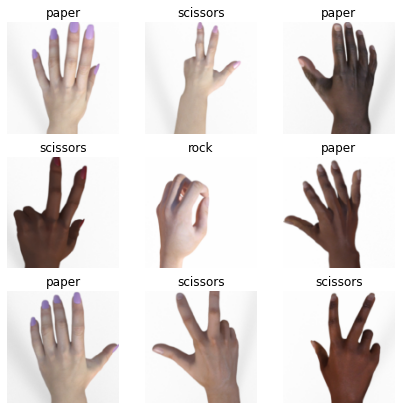

In [16]:
dls = rps_datablock.dataloaders(DATASET_PATH)
dls.show_batch(max_n=9, figsize=(7,7))

In [7]:
rps_datablock.summary(DATASET_PATH)

Setting-up type transforms pipelines
Found 5850 items
2 datasets of sizes 5040,0
Setting up Pipeline: PILBase.create
Setting up Pipeline: parent_label -> Categorize -- {'vocab': None, 'sort': True, 'add_na': False}

Building one sample
  Pipeline: PILBase.create
    starting from
      RockPaperScissors/data/Rock-Paper-Scissors/train/paper/paper03-088.png
    applying PILBase.create gives
      PILImage mode=RGB size=300x300
  Pipeline: parent_label -> Categorize -- {'vocab': None, 'sort': True, 'add_na': False}
    starting from
      RockPaperScissors/data/Rock-Paper-Scissors/train/paper/paper03-088.png
    applying parent_label gives
      paper
    applying Categorize -- {'vocab': None, 'sort': True, 'add_na': False} gives
      TensorCategory(0)

Final sample: (PILImage mode=RGB size=300x300, TensorCategory(0))


Found 5850 items
2 datasets of sizes 5040,0
Setting up Pipeline: PILBase.create
Setting up Pipeline: parent_label -> Categorize -- {'vocab': None, 'sort': True, 'add_na':

In [17]:
learn = cnn_learner(dls, resnet34, metrics=error_rate)

In [18]:
learn.model

Sequential(
  (0): Sequential(
    (0): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace=True)
    (3): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
    (4): Sequential(
      (0): BasicBlock(
        (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (relu): ReLU(inplace=True)
        (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      )
      (1): BasicBlock(
        (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  

In [19]:
learn.fit_one_cycle(2)

epoch,train_loss,valid_loss,error_rate,time
0,0.272764,0.187290,0.064516,02:50
1,0.072119,0.240835,0.067204,02:47


In [20]:
interpre = ClassificationInterpretation.from_learner(learn)

In [22]:
losses, indxs = interpre.top_losses()

In [23]:
len(dls.valid_ds) == len(losses) == len(indxs)

True

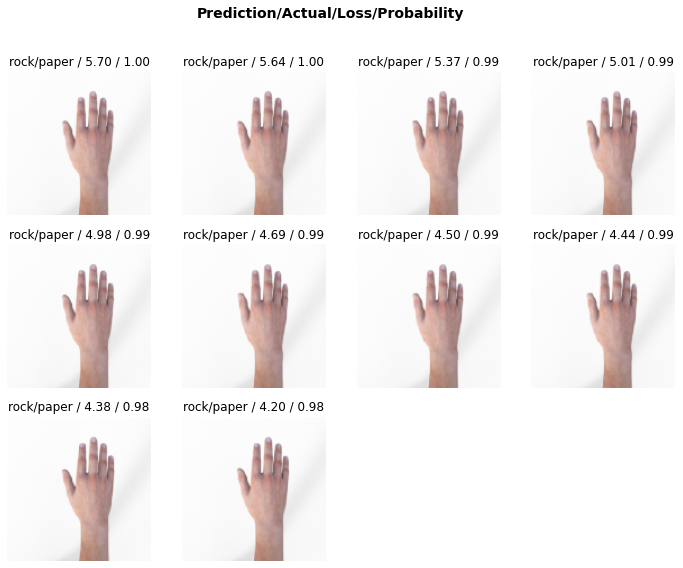

In [25]:
interpre.plot_top_losses(10)

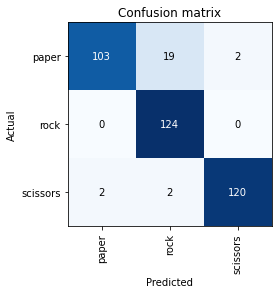

In [39]:
interpre.plot_confusion_matrix()

In [28]:
learn.predict(DATASET_PATH/'test2/rock1.png')

('rock', tensor(1), tensor([1.1456e-01, 8.8543e-01, 1.6028e-05]))

In [29]:
learn.predict(DATASET_PATH/'test2/scissors1.png')

('scissors', tensor(2), tensor([1.0351e-05, 6.4521e-05, 9.9993e-01]))

In [30]:
learn.predict(DATASET_PATH/'test2/scissors5.png')

('scissors', tensor(2), tensor([1.4468e-05, 2.5886e-05, 9.9996e-01]))

In [31]:
learn.predict(DATASET_PATH/'test2/rock3.png')

('rock', tensor(1), tensor([9.0636e-07, 1.0000e+00, 1.1409e-06]))

In [32]:
learn.predict(DATASET_PATH/'test2/paper1.png')

('rock', tensor(1), tensor([0.1072, 0.8867, 0.0061]))

In [33]:
learn.predict(DATASET_PATH/'test2/paper6.png')

('paper', tensor(0), tensor([9.9986e-01, 1.2468e-04, 1.6231e-05]))

In [34]:
learn2 = cnn_learner(dls, resnet34, metrics=accuracy)
learn2.model

Sequential(
  (0): Sequential(
    (0): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace=True)
    (3): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
    (4): Sequential(
      (0): BasicBlock(
        (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (relu): ReLU(inplace=True)
        (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      )
      (1): BasicBlock(
        (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  

In [35]:
learn2.fit_one_cycle(2)

epoch,train_loss,valid_loss,accuracy,time
0,0.281293,0.167264,0.954301,05:08
1,0.074194,0.171020,0.951613,02:47


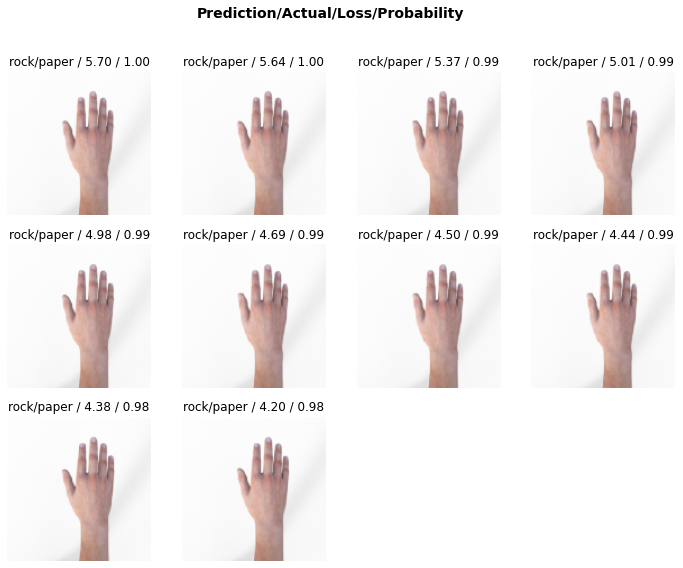

In [37]:
interpre2 = ClassificationInterpretation.from_learner(learn)
interpre2.plot_top_losses(10)

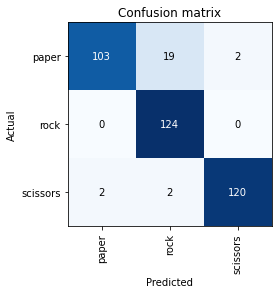

In [38]:
interpre2.plot_confusion_matrix()